In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


#from sunpy import timeseries as ts
from sunpy.net import Fido
from sunpy.net import attrs as a

from sunpy.timeseries import TimeSeries

In [2]:
### To test sunpy correctly install
#import sunpy
#sunpy.self_test()

In [3]:
tstart = '2022-04-25 01:00'
tend = '2022-04-25 23:00'

result_goes16 = Fido.search(a.Time(tstart,tend), a.Instrument('XRS'),a.goes.SatelliteNumber(16))
result_goes17 = Fido.search(a.Time(tstart,tend), a.Instrument('XRS'),a.goes.SatelliteNumber(17))
#,a.goes.SatelliteNumber(16)
print(result_goes16)

Results from 1 Provider:

1 Results from the XRSClient:
Source: https://umbra.nascom.nasa.gov/goes/fits

       Start Time               End Time        Instrument ... Source Provider
----------------------- ----------------------- ---------- ... ------ --------
2022-04-25 00:00:00.000 2022-04-25 23:59:59.999        XRS ...   GOES     NOAA




In [4]:
pwd

'/Users/Mila/Desktop/Solar_Flare/Solar_Flare'

In [5]:
file_goes16 = Fido.fetch(result_goes16,path='/Users/Mila/Downloads/datacamp')
file_goes17 = Fido.fetch(result_goes17,path='/Users/Mila/Downloads/datacamp')

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

sci_xrsf-l2-flx1s_g16_d20220425_v2-1-0.nc:   0%|          | 0.00/4.91M [00:00<?, ?B/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

sci_xrsf-l2-flx1s_g17_d20220425_v2-1-0.nc:   0%|          | 0.00/5.08M [00:00<?, ?B/s]

In [6]:
goes16 = TimeSeries(file_goes16, concatenate=True)
goes17 = TimeSeries(file_goes17, concatenate=True)

<sunpy.timeseries.sources.goes.XRSTimeSeries object at 0x7fa19d7d8280>
|-------------------------------------------------------------------------------------------------|
|TimeRange                  | Columns         | Meta                                              |
|-------------------------------------------------------------------------------------------------|
|2022-04-24T23:59:59.776181 | xrsa            | conventions: ACDD-1.3, Spase v2.2.6               |
|            to             | xrsb            | title: L2 XRS 1-s fluxes                          |
|2022-04-25T23:59:59.025029 |                 | summary: The X-Ray 1s flux product consists of hig|
|                           |                 | keywords: NumericalData.MeasurementType.Irradiance|
|                           |                 | keywords_vocabulary: SPASE: Space Physics Archive |
|                           |                 | naming_authority: gov.nesdis.noaa                 |
|                           |                 | history: See algorithm information.               |
|                           |                 | source: GOES-R EXIS/XRS L1b                       |
|                           |                 | processing_level: Level 2                         |
|                           |                 | processing_level_description: Derived products    |
|                           |                 | ...                                               |
|-------------------------------------------------------------------------------------------------|

                                    xrsa      xrsb
2022-04-24 23:59:59.776181  4.791470e-08  0.000001
2022-04-25 00:00:00.776181  4.358424e-08  0.000001
2022-04-25 00:00:01.776184  5.654471e-08  0.000001
2022-04-25 00:00:02.776185  5.221424e-08  0.000001
2022-04-25 00:00:03.776196  5.437174e-08  0.000001
...                                  ...       ...
2022-04-25 23:59:55.025016  4.789924e-08  0.000002
2022-04-25 23:59:56.025019  4.144220e-08  0.000002
2022-04-25 23:59:57.025026  5.113549e-08  0.000002
2022-04-25 23:59:58.025023  5.115096e-08  0.000002
2022-04-25 23:59:59.025029  4.897799e-08  0.000002

[86400 rows x 2 columns]
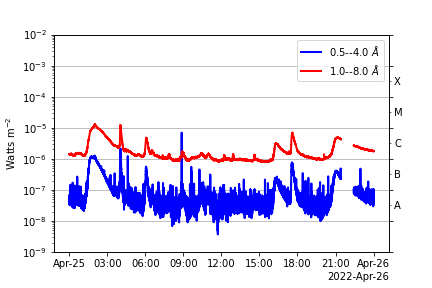

In [7]:
goes16

In [8]:
serie16 = goes16.to_dataframe()
serie17 = goes17.to_dataframe()

In [9]:
serie16.index = serie16.index.floor('s')
serie17.index = serie17.index.floor('s')

In [10]:
serie16 = serie16.add_suffix('_16')
serie17 = serie17.add_suffix('_17')

In [18]:
XRS = pd.concat([serie16,serie17], axis=1)
## Examine the DataFrame /inspect data
XRS.head()

,xrsa_16,xrsb_16,xrsa_17,xrsb_17
2022-04-24 23:59:59,4.791470e-08,0.000001,NaN,NaN
2022-04-25 00:00:00,4.358424e-08,0.000001,6.129274e-08,0.000001
2022-04-25 00:00:01,5.654471e-08,0.000001,8.665445e-08,0.000001
2022-04-25 00:00:02,5.221424e-08,0.000001,6.223206e-08,0.000001
2022-04-25 00:00:03,5.437174e-08,0.000001,7.633447e-08,0.000001


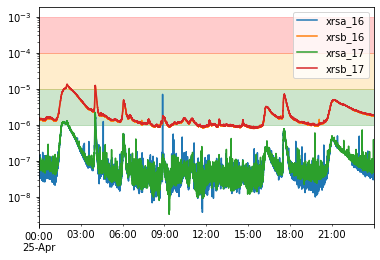

In [12]:
### Raw data plots
ax= XRS.plot(logy=True)

# Add horizontals shaded region
ax.axhspan(10e-7,10e-6,color='green',alpha=0.2)
ax.axhspan(10e-6,10e-5,color='orange',alpha=0.2)
ax.axhspan(10e-5,10e-4,color='red',alpha=0.2)

<AxesSubplot:ylabel='Frequency'>

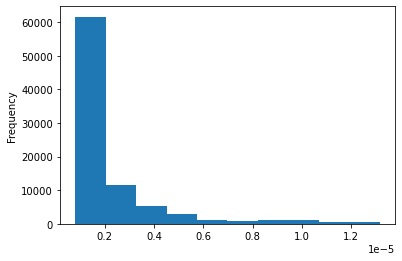

In [50]:
### Histograms : understand our data's distributions
#XRS.plot.hist(subplots=True)
XRS['xrsb_17'].plot.hist()

To get the percent change over a period, we can use .pct_change()

<AxesSubplot:ylabel='Frequency'>

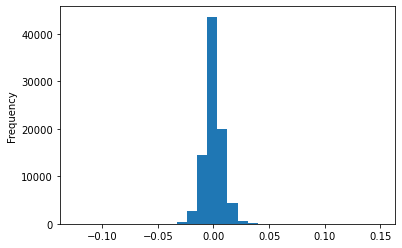

In [39]:
### Histogram of the percent changes over time 
XRS['xrsb_17'].pct_change().plot.hist(bins=30)

<AxesSubplot:ylabel='Frequency'>

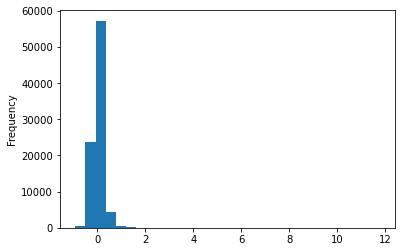

In [40]:
XRS['xrsa_17'].pct_change().plot.hist(bins=30)

<AxesSubplot:>

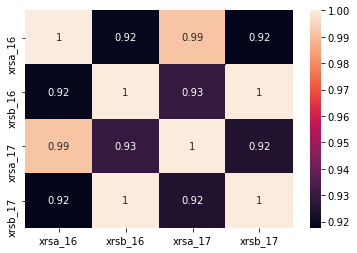

In [13]:
#### Correlations
correlations = XRS.corr()

import seaborn as sns

#sns.heatmap(correlations>0.95, annot=True)
sns.heatmap(correlations, annot=True)

In [14]:
XRS.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 86401 entries, 2022-04-24 23:59:59 to 2022-04-25 23:59:59
Freq: S
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   xrsa_16  82781 non-null  float32
 1   xrsb_16  82781 non-null  float32
 2   xrsa_17  86400 non-null  float32
 3   xrsb_17  86400 non-null  float32
dtypes: float32(4)
memory usage: 2.0 MB


In [16]:
#### MISSING VALUES
## .isna()
XRS.isnull().sum()

xrsa_16    3620
xrsb_16    3620
xrsa_17       1
xrsb_17       1
dtype: int64

In [34]:
### Percentage of missing
XRS.isnull().mean()*100

xrsa_16    4.189766
xrsb_16    4.189766
xrsa_17    0.001157
xrsb_17    0.001157
dtype: float64

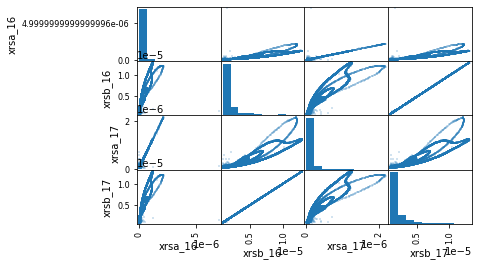

In [42]:
### Scatter plots
_=pd.plotting.scatter_matrix(XRS, alpha=0.2, marker='+', s=2)
#for i, axs in enumerate(_):
    #for j, ax in enumerate(axs):
        #if i != j:  # only the scatter plots
            #ax.set_xscale('log')
            #ax.set_yscale('log')

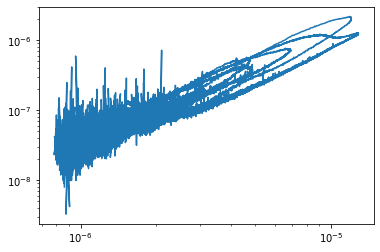

In [53]:
plt.loglog(XRS['xrsb_16'],XRS['xrsa_17'])

                     5d_close_pct  5d_close_future_pct
5d_close_pct             1.000000             0.047931
5d_close_future_pct      0.047931             1.000000


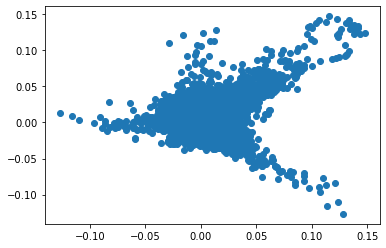

In [54]:
# Create 8- % changes of xrsb 
XRS['5d_future_close'] = XRS['xrsb_17'].shift(-8)
XRS['5d_close_future_pct'] = XRS['5d_future_close'].pct_change(8)
XRS['5d_close_pct'] = XRS['xrsb_17'].pct_change(8)

# Calculate the correlation matrix (current and future)
corr = XRS[['5d_close_pct', '5d_close_future_pct']].corr()
print(corr)

# Scatter the current 8- percent change vs the future 8- percent change
plt.scatter(XRS['5d_close_pct'], XRS['5d_close_future_pct'])
plt.show()